In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv("/home/aditya/ADITYA/Projects/Denoise/audio_features_with_labels.csv")

In [3]:
dataset 

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,label
0,-299.82755,161.920550,-42.986015,17.291681,-9.258543,0.352771,-22.677830,-16.391844,-20.816635,-6.810088,...,0.200054,0.166085,0.288850,0.146710,0.210376,0.234634,0.390072,0.343456,0.241421,fold8
1,-159.23601,141.497200,-72.412490,-14.045747,-31.530480,-2.079339,-31.011710,3.170327,-22.956690,-2.027877,...,0.300713,0.365584,0.182047,0.241449,0.430506,0.307052,0.353095,0.198946,0.270798,fold8
2,-347.25380,81.683920,4.630914,29.517320,-2.358563,7.258026,1.432311,11.312077,-11.228522,8.196815,...,0.354507,0.266855,0.257950,0.272695,0.276310,0.290093,0.270885,0.282254,0.289429,fold8
3,-236.47750,169.871190,-36.489277,33.065678,-11.959123,26.728968,-29.550335,22.830448,-19.267536,5.290238,...,0.245136,0.229481,0.262452,0.237843,0.503760,0.319610,0.238971,0.241377,0.295423,fold8
4,-391.06015,106.025536,3.993231,28.169186,13.174751,6.092801,-15.872272,-2.305582,-5.397427,-5.592200,...,0.260017,0.255695,0.259007,0.309162,0.313341,0.282600,0.243095,0.225221,0.173567,fold8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-127.10550,75.694000,-40.375282,52.278736,1.591725,30.898699,-9.234956,27.621975,1.926606,-0.616720,...,0.208848,0.189586,0.216372,0.239839,0.435918,0.405155,0.368892,0.138490,0.220771,fold4
8728,-337.26440,142.297150,-68.321785,33.001240,-29.197311,16.973269,7.759877,9.823354,6.562455,10.994356,...,0.332337,0.399194,0.452183,0.249549,0.269017,0.250904,0.238200,0.196331,0.221189,fold4
8729,-528.29890,136.650330,6.392556,1.529255,-13.484799,-8.145865,-5.186058,6.606945,0.167064,-5.328062,...,0.284440,0.270789,0.245537,0.268527,0.272564,0.318459,0.316753,0.302065,0.296234,fold4
8730,-257.98395,147.511120,-26.680098,49.505590,-13.572097,38.290874,-8.247279,21.642666,-11.039514,21.161846,...,0.315960,0.249379,0.227828,0.193679,0.145686,0.556835,0.260564,0.321886,0.152597,fold4


In [4]:
# Assuming 'label' column has values like 'fold8', 'fold4', etc.
dataset['label'] = dataset['label'].map(lambda x: int(x.replace('fold', '')))

In [5]:
X=dataset.iloc[:,:-1].values
Y=dataset['label']
L=[0,0,0,0,0,0,0,0,0,0,0]
num =[1,2,3,4,5,6,7,8,9,10]
for i in Y:
    if i in num:
        L[i]=L[i]+1
print(L)
    

[0, 873, 888, 925, 990, 936, 823, 838, 806, 816, 837]


In [12]:
X

array([[-2.9982755e+02,  1.6192055e+02, -4.2986015e+01, ...,
         3.9007150e-01,  3.4345585e-01,  2.4142067e-01],
       [-1.5923601e+02,  1.4149720e+02, -7.2412490e+01, ...,
         3.5309494e-01,  1.9894566e-01,  2.7079767e-01],
       [-3.4725380e+02,  8.1683920e+01,  4.6309137e+00, ...,
         2.7088463e-01,  2.8225362e-01,  2.8942886e-01],
       ...,
       [-5.2829890e+02,  1.3665033e+02,  6.3925557e+00, ...,
         3.1675318e-01,  3.0206516e-01,  2.9623410e-01],
       [-2.5798395e+02,  1.4751112e+02, -2.6680098e+01, ...,
         2.6056445e-01,  3.2188594e-01,  1.5259673e-01],
       [-4.4302002e+02,  2.4394133e+02,  1.3164351e+01, ...,
         3.1906390e-01,  3.0100134e-01,  2.3822118e-01]])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [16]:
X_train[0]

array([-5.9508710e+02,  1.3065553e+02,  1.6845398e+01,  1.1200730e+01,
        1.2309774e+01,  9.0795000e+00,  6.3518790e+00,  5.7837605e+00,
        7.6222863e+00,  7.7056446e+00,  6.4023843e+00,  7.5124440e+00,
        9.8665270e+00,  6.8894010e-01,  7.4320300e-01,  8.0511220e-01,
        8.4742060e-01,  8.8149005e-01,  8.6919200e-01,  8.4112930e-01,
        7.9987204e-01,  7.4011785e-01,  7.0835584e-01,  6.8087220e-01,
        6.5152806e-01,  5.5934940e-01,  8.7083710e-01,  7.9195637e-01,
        7.2093410e-01,  5.6196433e-01,  5.0333690e-01,  5.5457480e-01,
        5.0915620e-01,  4.1707617e-01,  3.9259392e-01,  3.7384883e-01,
        3.5641220e-01,  3.1637692e-01,  4.4219580e-01,  3.7779397e-01,
        3.4822175e-01,  2.5522906e-01,  2.4859901e-01,  2.7737266e-01,
        2.3984508e-01,  1.4733400e-01,  1.6061336e-01,  1.2553310e-01,
        1.2143661e-01])

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled[0]

array([0.22726833, 0.5238175 , 0.73942602, 0.5210466 , 0.62812098,
       0.53710678, 0.52511501, 0.54010561, 0.54428425, 0.64989443,
       0.65427901, 0.56670976, 0.62206029, 0.68848272, 0.7427765 ,
       0.80461756, 0.85176021, 0.88104807, 0.86888102, 0.84082665,
       0.81103362, 0.7399076 , 0.70807853, 0.68295484, 0.65096999,
       0.53968005, 0.86888744, 0.78788315, 0.70591137, 0.55033952,
       0.49165223, 0.54660048, 0.48814437, 0.39056515, 0.37293965,
       0.35657019, 0.3341133 , 0.39513412, 0.55021311, 0.43296075,
       0.42661219, 0.31083498, 0.2927605 , 0.36031854, 0.33649706,
       0.17675249, 0.19931971, 0.16756123, 0.13674967])

In [9]:
X.shape

(8732, 49)

In [28]:
model = models.Sequential([
    layers.Input(shape=(1, 49, 1)),  
    layers.Conv2D(128, (5, 5), padding='same', activation='relu', strides=1),
    
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    layers.Conv2D(256, (5, 5), padding='same', activation='relu', strides=1),
    
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    layers.Dropout(0.3),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 1, 49, 128)     │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 25, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 25, 256)     │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 13, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 13, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3328)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,704,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,062,794 (11.68 MB)

 Trainable params: 3,062,794 (11.68 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
print("Unique values in Y_train:", np.unique(Y_train))
print("Unique values in Y_test:", np.unique(Y_test))


Unique values in Y_train: [ 1  2  3  4  5  6  7  8  9 10]
Unique values in Y_test: [ 1  2  3  4  5  6  7  8  9 10]


In [33]:
Y_train=Y_train-1
Y_test=Y_test-1

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [34]:
X_train_scaled = X_train_scaled.reshape(-1, 1, 49, 1)
X_test_scaled = X_test_scaled.reshape(-1, 1, 49, 1)


In [35]:
X_train_scaled[0].shape

(1, 49, 1)

In [36]:
# Fit the model
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), batch_size=50, epochs=40)

Epoch 1/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.1105 - loss: 2.3040 - val_accuracy: 0.1208 - val_loss: 2.2943
Epoch 2/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1256 - loss: 2.2833 - val_accuracy: 0.1471 - val_loss: 2.2272
Epoch 3/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1759 - loss: 2.2031 - val_accuracy: 0.2473 - val_loss: 2.0946
Epoch 4/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.2703 - loss: 2.0570 - val_accuracy: 0.3383 - val_loss: 1.8998
Epoch 5/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.3759 - loss: 1.8224 - val_accuracy: 0.4276 - val_loss: 1.6908
Epoch 6/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.4417 - loss: 1.6162 - val_accuracy: 0.4894 - val_loss: 1.5244
Epoch 7/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.5067 - loss: 1.4698 - val_accuracy: 0.5283 - val_loss: 1.4101
Epoch 8/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.5616 - loss: 1.3296 - val_acc

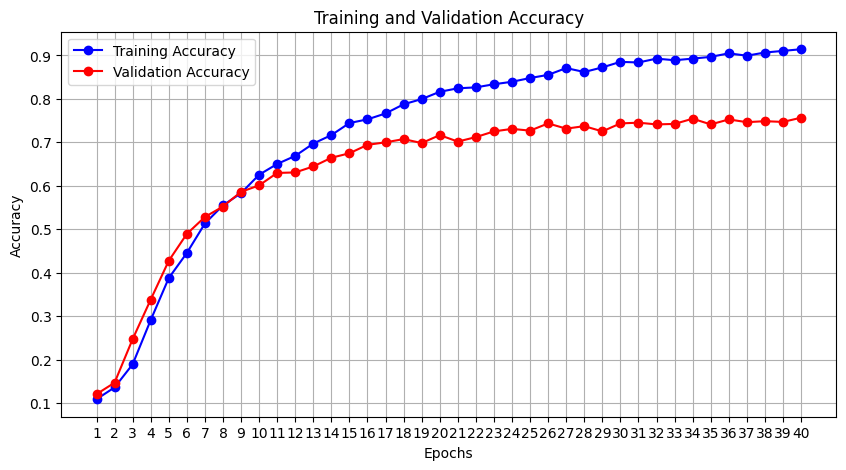

In [39]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting epochs
epochs = range(1, len(train_acc) + 1)

# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')

# Adding titles and labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Set x-ticks to the number of epochs
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [40]:
model.save('trained_cnn_model.h5')